In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

from plotnine import *

C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Data Creation

In [2]:
X, y = make_blobs(n_samples=1000, 
                 centers=3,
                 cluster_std=1,
                 random_state=123)

In [5]:
df = pd.DataFrame(X)
df.columns = ['x1', 'x2']
df['y_true'] = y

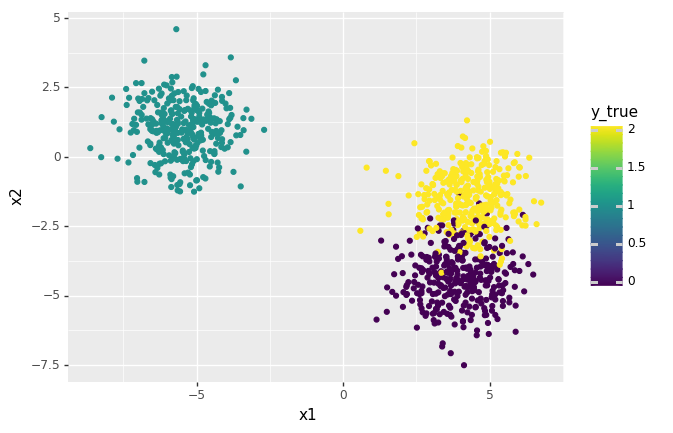

<ggplot: (141584194452)>

In [10]:
(ggplot(df)
  + aes(x='x1', y='x2', color='y_true')
  + geom_point()
)

# Modeling

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['x1', 'x2']
centers

,x1,x2
0,4.316794,-1.467530
1,-5.490403,0.991089
2,3.943948,-4.428466


In [14]:
df['y_kmeans'] = kmeans.predict(X)

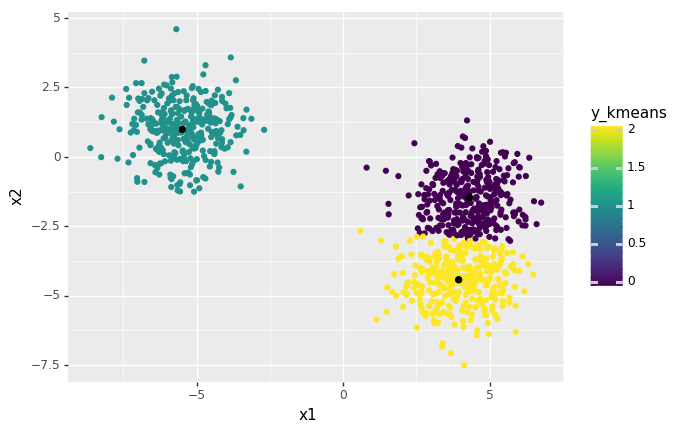

<ggplot: (141586245857)>

In [18]:
(ggplot(df)
 + aes(x='x1', y='x2')
 + geom_point(aes(color='y_kmeans'))
 + geom_point(data=centers, mapping=aes(x='x1', y='x2'), color='black', size=2)
)